In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [7]:
# We can view all of the classes that automap found


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
import datetime as dt

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# 2017 august 20 is our last date that's in the db
lastdayInDB = dt.date(2017, 8, 20)
lastdayminusoneyear = lastdayInDB - dt.timedelta(days=365)

In [12]:
# Perform a query to retrieve the data and precipitation scores
lastyearsResults = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=lastdayminusoneyear).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(lastyearsResults, columns = ("date" , "prcp"))

In [14]:
df

,date,prcp
0,2016-08-20,0.00
1,2016-08-21,0.12
2,2016-08-22,0.40
3,2016-08-23,0.00
4,2016-08-24,0.08
...,...,...
2243,2017-08-19,0.09
2244,2017-08-20,NaN
2245,2017-08-21,0.56
2246,2017-08-22,0.50


# Exploratory Climate Analysis

In [15]:
# Sort the dataframe by date
df.sort_values(by='date')


,date,prcp
0,2016-08-20,0.00
1541,2016-08-20,0.13
710,2016-08-20,0.00
1896,2016-08-20,0.20
364,2016-08-20,0.03
...,...,...
1539,2017-08-22,0.00
1016,2017-08-23,0.00
1540,2017-08-23,0.08
363,2017-08-23,0.00


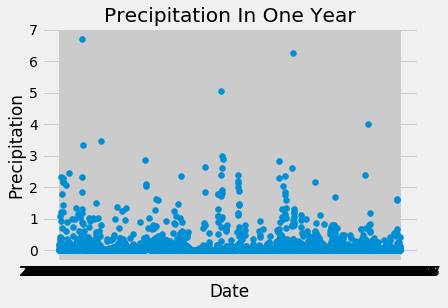

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.title("Precipitation In One Year")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.scatter(df['date'],df["prcp"] )

plt.show()


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2037.000000
mean,0.179632
std,0.463275
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
stationcount = session.query(Station.station).count()
print(f"There are {stationcount} stations")

There are 9 stations


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0)]

In [38]:
session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 85.0)]

In [39]:
session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 71.66378066378067)]

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastyeartemp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >=lastdayminusoneyear).\
    filter(Measurement.station == 'USC00519281').all()

In [34]:
lastyeartemp_df = pd.DataFrame(lastyeartemp)
lastyeartemp_df

,station,tobs
0,USC00519281,81.0
1,USC00519281,79.0
2,USC00519281,78.0
3,USC00519281,77.0
4,USC00519281,77.0
...,...,...
350,USC00519281,77.0
351,USC00519281,77.0
352,USC00519281,76.0
353,USC00519281,76.0


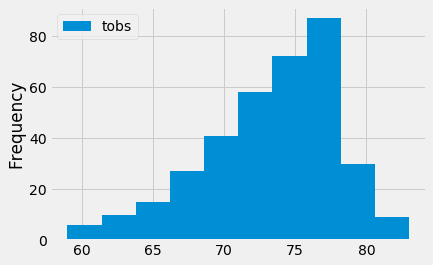

In [37]:
lastyeartemp_df.plot.hist()

## Bonus Challenge Assignment

In [40]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-06-28', '2016-07-06'))

[(71.0, 76.98148148148148, 82.0)]


In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
